In [1]:
import pandas as pd

mutations = pd.read_csv("../analysis/merged_variants_anno_vaf.txt", sep="\t", header=0, index_col=0)
novartis = pd.read_excel("../analysis/novartis_panel.xlsx")

In [2]:
from collections import defaultdict

variants_novartis = defaultdict(list)
for index, row in novartis.iterrows():
    variants_novartis['chr{}'.format(row['MUTATION'])].append((row['SAMPLE_ID'].split('_')[-1], 
                                                               row['VAF']))

In [3]:
print(set(novartis['PATIENT_ID']))
print(set(novartis['SAMPLE_ID']))
print(len(set(novartis['SAMPLE_ID'])))
print(len(variants_novartis))

{'VHIO_42', 'VHIO_39', 'VHIO_43', 'VHIO_40', 'VHIO_41'}
{'809_MCB809', '621_ARM621', '721_DAS721', '1109_IGO1109', '786_ARM786', '687_IGO687', '976_IGO976', '1273_IGO1273', '1207_JAM1207', '1167_DAS1167', '869_IGO869', '1031_JAM1031', '776_JAM776', '826_JAM826', '690_MCB690', '901_DAS901', '941_JAM941', '861_DAS861', '784_IGO784', '522_MCB522', '634_DAS634', '1065_DAS1065', '529_DAS529', '795_DAS795', '682_DAS682', '867_ARM867'}
26
45


In [4]:
novartis_patients = list(set(novartis['PATIENT_ID']))
novartis_samples = [x.split('_')[-1] for x in set(novartis['SAMPLE_ID'])]

variants_exomes = defaultdict(list)
COLUMNS = [x for x in mutations.columns[14:] if any([y in x.replace('_', '') for y in novartis_samples])]
for index, row in mutations.loc[:,COLUMNS].iterrows():
    vafs = [(''.join(x.split('-')[0].split('_')[0:2]), float(y)) 
                                               for x,y in row.items() if float(y) != 0.0]
    if len(vafs) > 0:
        variants_exomes[index.replace(" ", "")] = vafs

Variants exomes 11060
Variants novartis 45
Shared variants 16
Shared variants samples 32
Novartis variants samples 64
Exome variants samples 0


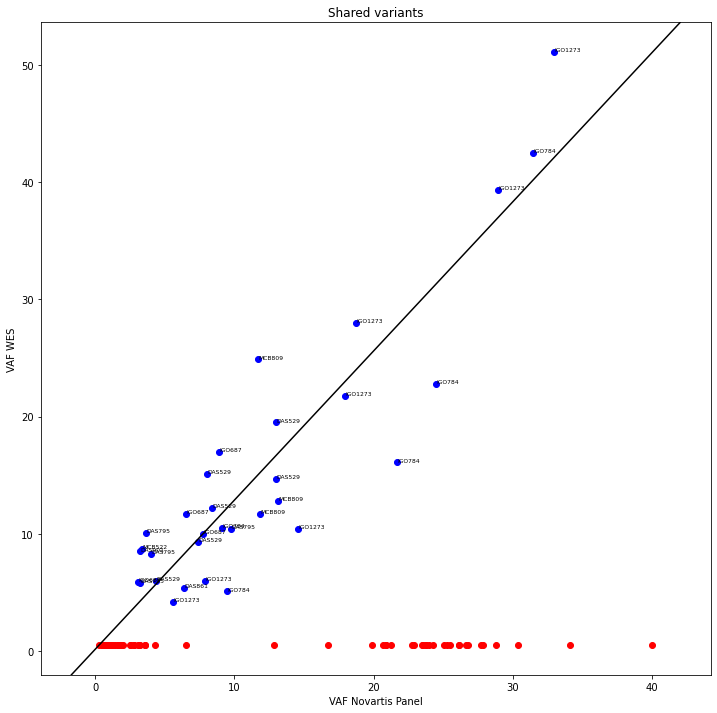

In [5]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 12))

print('Variants exomes {}'.format(len(variants_exomes)))
print('Variants novartis {}'.format(len(variants_novartis)))
      
shared_variants = set(variants_novartis.keys()) & set(variants_exomes.keys())
print('Shared variants {}'.format(len(shared_variants)))

shared_samples = 0
samples_novartis = 0
samples_exome = 0
for v in shared_variants:
    for s1,v1 in variants_novartis[v]:
        found = False
        for s2,v2 in variants_exomes[v]:
            if s1 == s2:
                plt.scatter(v1, v2, color='blue')
                plt.text(v1 + .03, v2 + .03, s1, fontsize=6)
                shared_samples += 1
                found = True
                break
        if not found:
            samples_novartis += 1
            plt.scatter(v1, 0.5, color='red')
    for s1,v1 in variants_exomes[v]:
        found = False
        for s2,v2 in variants_novartis[v]:
            if s1 == s2:
                found = True
                break
        if not found:
            samples_exome += 1
            plt.scatter(0.5, v1, color='red')
            
print('Shared variants samples {}'.format(shared_samples))
print('Novartis variants samples {}'.format(samples_novartis))
print('Exome variants samples {}'.format(samples_exome))

y_lim = plt.ylim()
x_lim = plt.xlim()
plt.plot(x_lim, y_lim, '-', color = 'black')
plt.ylim(y_lim)
plt.title('Shared variants')
plt.xlabel('VAF Novartis Panel')
plt.ylabel('VAF WES')
plt.show()